   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000    

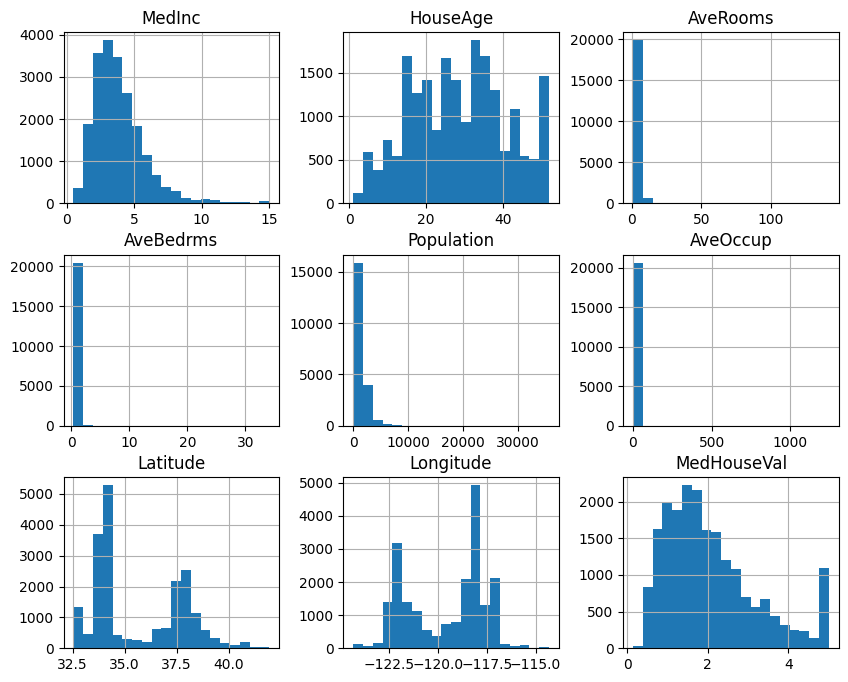

Training set shape: (16512, 8)
Testing set shape: (4128, 8)
[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]
Mean Squared Error : 0.5559
R squared : 0.58


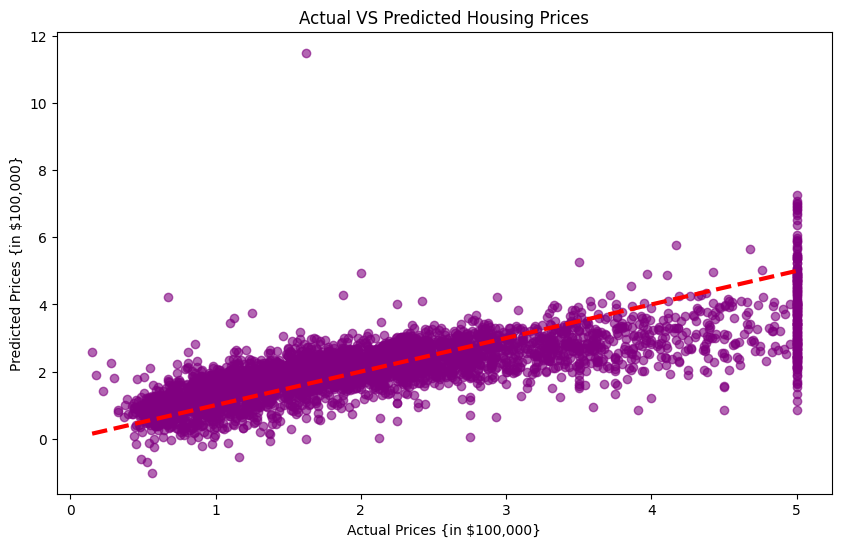

            Coefficients
MedInc          0.448675
HouseAge        0.009724
AveRooms       -0.123323
AveBedrms       0.783145
Population     -0.000002
AveOccup       -0.003526
Latitude       -0.419792
Longitude      -0.433708


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

#Loading Dataset
california = fetch_california_housing(as_frame=True)

df = california.frame
print(df.head())           

#Checking for the missing values
print(df.isnull().sum())

#summary Statistics
print(df.describe())

# Visualing the data
df.hist(bins=20, figsize=(10,8))
plt.show()

#Spliting the data into features x and target y
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

#Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

#Training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making prediction
y_pred = model.predict(X_test)
print(y_pred)

#Evaluating the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error : {mse:.4f}")

r2 = r2_score(y_test, y_pred)
print(f"R squared : {r2:.2f}")

# Visualizing the Actual VS Predicted values
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="purple")
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--', lw=3)
plt.title('Actual VS Predicted Housing Prices')
plt.xlabel('Actual Prices {in $100,000}')
plt.ylabel('Predicted Prices {in $100,000}')
plt.show()

#Displaying model co-efficients
coefficients = pd.DataFrame(model.coef_ , X.columns, columns = ['Coefficients'])
print(coefficients)


